In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ponta do sol
Processing Record 2 of Set 1 | vila velha
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | santa rosa
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | san luis
Processing Record 7 of Set 1 | hailar
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | dingle
Processing Record 10 of Set 1 | andenes
Processing Record 11 of Set 1 | torbay
Processing Record 12 of Set 1 | rio gallegos
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | svetlopolyansk
Processing Record 17 of Set 1 | saint-francois
Processing Record 18 of Set 1 | vardo
Processing Record 19 of Set 1 | ranong
Processing Record 20 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Recor

Processing Record 40 of Set 4 | vermilion
Processing Record 41 of Set 4 | tortoli
Processing Record 42 of Set 4 | lorengau
Processing Record 43 of Set 4 | kloulklubed
Processing Record 44 of Set 4 | norden
Processing Record 45 of Set 4 | impfondo
Processing Record 46 of Set 4 | loukhi
Processing Record 47 of Set 4 | ketchikan
Processing Record 48 of Set 4 | canavieiras
Processing Record 49 of Set 4 | mutoko
Processing Record 50 of Set 4 | port shepstone
Processing Record 1 of Set 5 | comodoro rivadavia
Processing Record 2 of Set 5 | tarakan
Processing Record 3 of Set 5 | tuktoyaktuk
Processing Record 4 of Set 5 | iqaluit
Processing Record 5 of Set 5 | puerto ayora
Processing Record 6 of Set 5 | bahia de caraquez
Processing Record 7 of Set 5 | kavieng
Processing Record 8 of Set 5 | avarua
Processing Record 9 of Set 5 | la ronge
Processing Record 10 of Set 5 | buraydah
Processing Record 11 of Set 5 | bismarck
Processing Record 12 of Set 5 | upernavik
Processing Record 13 of Set 5 | amboa

Processing Record 24 of Set 8 | ippy
Processing Record 25 of Set 8 | san ramon
Processing Record 26 of Set 8 | jacmel
Processing Record 27 of Set 8 | saint-joseph
Processing Record 28 of Set 8 | flin flon
Processing Record 29 of Set 8 | mayo
Processing Record 30 of Set 8 | hualmay
Processing Record 31 of Set 8 | houlton
Processing Record 32 of Set 8 | joensuu
Processing Record 33 of Set 8 | kuopio
Processing Record 34 of Set 8 | lazaro cardenas
Processing Record 35 of Set 8 | mayumba
Processing Record 36 of Set 8 | bauchi
Processing Record 37 of Set 8 | kipini
Processing Record 38 of Set 8 | jiblah
Processing Record 39 of Set 8 | shubarkuduk
Processing Record 40 of Set 8 | naron
Processing Record 41 of Set 8 | gidam
Processing Record 42 of Set 8 | san jose
Processing Record 43 of Set 8 | inirida
Processing Record 44 of Set 8 | port-gentil
Processing Record 45 of Set 8 | gari
Processing Record 46 of Set 8 | rapid valley
Processing Record 47 of Set 8 | sindand
City not found. Skipping...

Processing Record 14 of Set 12 | otradinskiy
City not found. Skipping...
Processing Record 15 of Set 12 | harrisonburg
Processing Record 16 of Set 12 | pedernales
Processing Record 17 of Set 12 | verkhoyansk
Processing Record 18 of Set 12 | pavilosta
Processing Record 19 of Set 12 | valdivia
Processing Record 20 of Set 12 | hutang
Processing Record 21 of Set 12 | coolum beach
Processing Record 22 of Set 12 | mandalgovi
Processing Record 23 of Set 12 | asyut
Processing Record 24 of Set 12 | winslow
Processing Record 25 of Set 12 | itarema
Processing Record 26 of Set 12 | airai
Processing Record 27 of Set 12 | bytosh
Processing Record 28 of Set 12 | edson
Processing Record 29 of Set 12 | karang tengah
Processing Record 30 of Set 12 | marevo
Processing Record 31 of Set 12 | bac lieu
Processing Record 32 of Set 12 | baneh
Processing Record 33 of Set 12 | aklavik
Processing Record 34 of Set 12 | aflu
City not found. Skipping...
Processing Record 35 of Set 12 | tarko-sale
Processing Record 3

In [11]:
len(city_data)

555

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ponta Do Sol,32.6667,-17.1000,66.13,29,10,14.12,PT,2022-02-01 06:19:44
1,Vila Velha,-20.3297,-40.2925,73.35,96,75,8.01,BR,2022-02-01 06:19:44
2,College,64.8569,-147.8028,-14.42,74,0,4.61,US,2022-02-01 06:18:41
3,Santa Rosa,14.3122,121.1114,86.09,62,60,16.22,PH,2022-02-01 06:19:45
4,New Norfolk,-42.7826,147.0587,76.66,32,23,4.00,AU,2022-02-01 06:19:45
5,San Luis,-33.2950,-66.3356,72.45,46,1,11.45,AR,2022-02-01 06:19:46
6,Hailar,49.2000,119.7000,-5.93,91,63,5.77,CN,2022-02-01 06:19:46
7,Castro,-24.7911,-50.0119,60.55,91,4,1.48,BR,2022-02-01 06:19:46
8,Dingle,10.9995,122.6711,82.89,73,99,12.75,PH,2022-02-01 06:19:47
9,Andenes,69.3143,16.1194,24.78,58,0,14.97,NO,2022-02-01 06:19:47


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [20]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ponta Do Sol,PT,2022-02-01 06:19:44,32.6667,-17.1000,66.13,29,10,14.12
1,Vila Velha,BR,2022-02-01 06:19:44,-20.3297,-40.2925,73.35,96,75,8.01
2,College,US,2022-02-01 06:18:41,64.8569,-147.8028,-14.42,74,0,4.61
3,Santa Rosa,PH,2022-02-01 06:19:45,14.3122,121.1114,86.09,62,60,16.22
4,New Norfolk,AU,2022-02-01 06:19:45,-42.7826,147.0587,76.66,32,23,4.00
5,San Luis,AR,2022-02-01 06:19:46,-33.2950,-66.3356,72.45,46,1,11.45
6,Hailar,CN,2022-02-01 06:19:46,49.2000,119.7000,-5.93,91,63,5.77
7,Castro,BR,2022-02-01 06:19:46,-24.7911,-50.0119,60.55,91,4,1.48
8,Dingle,PH,2022-02-01 06:19:47,10.9995,122.6711,82.89,73,99,12.75
9,Andenes,NO,2022-02-01 06:19:47,69.3143,16.1194,24.78,58,0,14.97


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


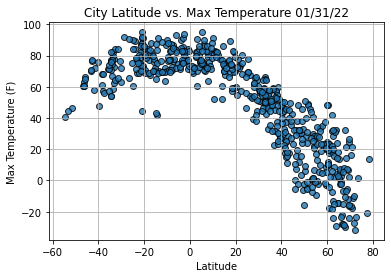

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

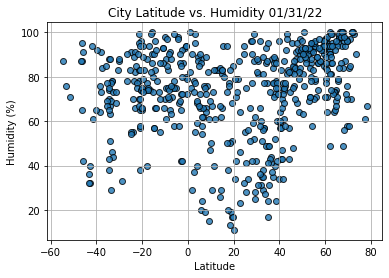

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

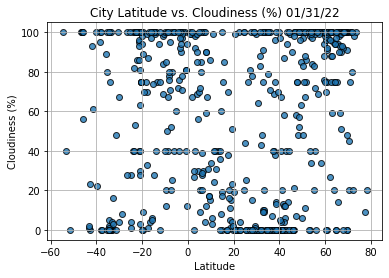

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

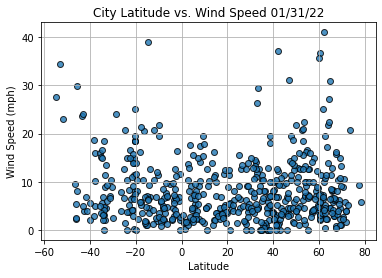

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2022-02-01 06:19:48
Lat                      -23.1203
Lng                     -134.9692
Max Temp                    78.26
Humidity                       66
Cloudiness                     53
Wind Speed                   8.34
Name: 13, dtype: object

In [36]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
550     True
551     True
552     True
553     True
554     True
Name: Lat, Length: 555, dtype: bool

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ponta Do Sol,PT,2022-02-01 06:19:44,32.6667,-17.1000,66.13,29,10,14.12
2,College,US,2022-02-01 06:18:41,64.8569,-147.8028,-14.42,74,0,4.61
3,Santa Rosa,PH,2022-02-01 06:19:45,14.3122,121.1114,86.09,62,60,16.22
6,Hailar,CN,2022-02-01 06:19:46,49.2000,119.7000,-5.93,91,63,5.77
8,Dingle,PH,2022-02-01 06:19:47,10.9995,122.6711,82.89,73,99,12.75


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

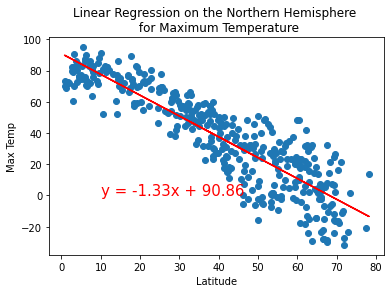

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,0))

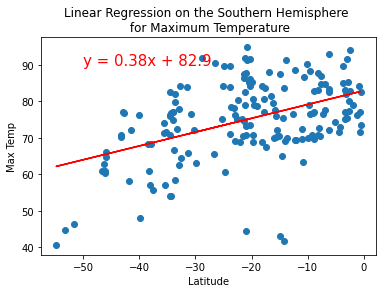

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

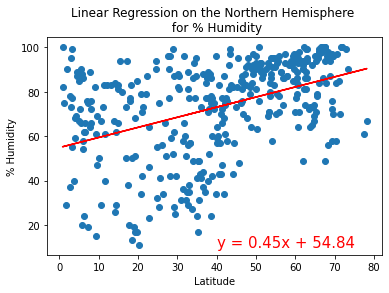

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


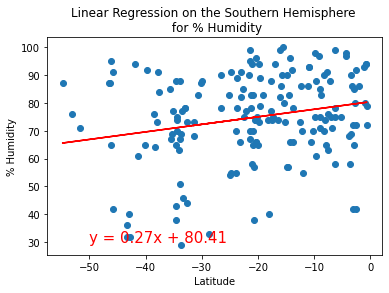

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,30))

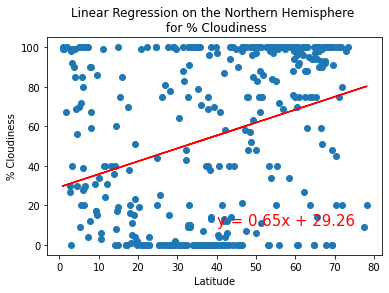

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))


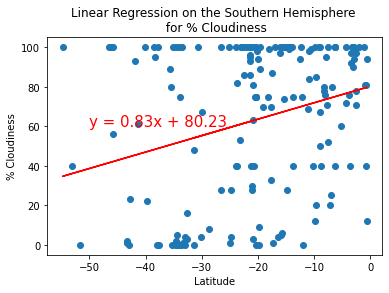

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))


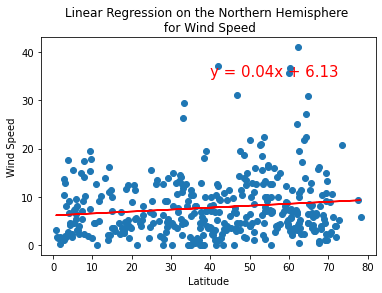

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

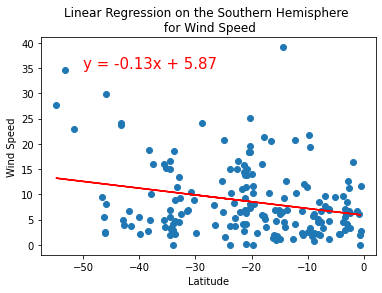

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))